In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

In [2]:
# Load your cleaned data
df = pd.read_csv('preprocessed_news.csv')

In [3]:
df.head()

,Unnamed: 0,text,class,preprocessed_text
0,0,WASHINGTON (Reuters) - President Donald Trump ...,1,washington reuters president donald trump stan...
1,1,The victim of the angry Bernie Sanders support...,0,the victim angry bernie sanders supporter amaz...
2,2,Liberals on Twitter accused President Donald T...,0,liberals twitter accused president donald trum...
3,3,"If you re sitting at your computer, take a dee...",0,if sitting computer take deep breath if readin...
4,4,HARARE (Reuters) - Zimbabwe s former president...,1,harare reuters zimbabwe former president rober...


In [4]:
# Extract features and labels
texts = df['preprocessed_text'].astype(str).tolist()
labels = df['class'].values

In [5]:
# Tokenize and pad the text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=300)


In [6]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=37,stratify = labels)

In [13]:
input_layer = tf.keras.Input(shape=(300,))
x = tf.keras.layers.Embedding(input_dim=10000, output_dim=64)(input_layer)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dense(16, activation='tanh', kernel_regularizer=regularizers.l2(0.01))(x)
x = tf.keras.layers.Dropout(0.6)(x)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [14]:
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

In [15]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train, y_train, epochs=5, batch_size=25, validation_split=0.1,callbacks = [early_stop])

Epoch 1/5
1294/1294 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6968 - loss: 0.6455 - val_accuracy: 0.9143 - val_loss: 0.2910
Epoch 2/5
1294/1294 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9251 - loss: 0.2697 - val_accuracy: 0.9402 - val_loss: 0.1976
Epoch 3/5
1294/1294 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9549 - loss: 0.1832 - val_accuracy: 0.9691 - val_loss: 0.1411
Epoch 4/5
1294/1294 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9651 - loss: 0.1447 - val_accuracy: 0.9780 - val_loss: 0.1058
Epoch 5/5
1294/1294 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9734 - loss: 0.1182 - val_accuracy: 0.9819 - val_loss: 0.0915


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Evaluation
print(classification_report(y_test, y_pred, digits=4))

281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step
              precision    recall  f1-score   support

           0     0.9832    0.9817    0.9824      4701
           1     0.9800    0.9816    0.9808      4283

    accuracy                         0.9816      8984
   macro avg     0.9816    0.9816    0.9816      8984
weighted avg     0.9816    0.9816    0.9816      8984



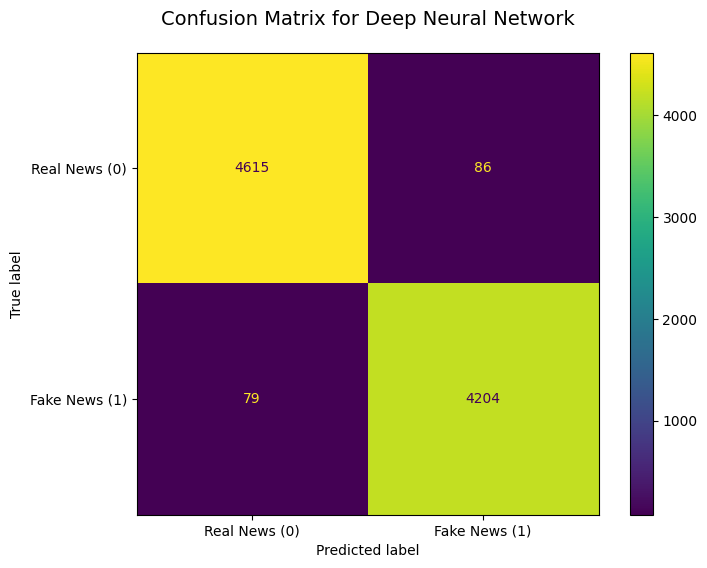

In [23]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=['Real News (0)', 'Fake News (1)'])

fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(ax=ax)
ax.set_title('Confusion Matrix for Deep Neural Network', fontsize=14, pad=20)
plt.show()
